<a href="https://colab.research.google.com/github/Resti000/learning_journal/blob/main/h8dsft_P0W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graded Challenge DSFT Phase 0 Week 1
### Berikut adalah dataset mengenai 721 Pokemon, yang di dalamnya ditampilkan karakter utama dan spesial serta keunggulan lainnya. 
### Melalui data tersebut, akan diperlihatkan seberapa banyak Pokemon yang tidak termasuk dual type atau bukan tipe ganda, tetapi memiliki nilai Total kekuatan yang cukup tinggi bila dibandingkan dengan yang memiliki tipe ganda.

##### Meng-import library Numpy dan Pandas untuk mampu mengakses perintah yang diperlukan

In [ ]:
import numpy as np
import pandas as pd

##### Meng-upload data Pokemon.csv pada notebook

In [ ]:
df = pd.read_csv('Pokemon.csv')

##### Memunculkan informasi mengenai banyak index dan kolom pada data, tipe data, kapasitas file, dan terlihat data yang kosong/missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### dari data di atas, dapat dilihat bahwa terdapat 800 data yang masuk dan memiliki 13 kolom.
##### pada Type 2 terdapat 386 data yang merupakan missing values.

##### Memunculkan 5 baris data paling atas untuk mengetahui gambaran data

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##### Memunculkan 5 baris data paling akhir untuk mengetahui gambaran data

In [ ]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


##### Memunculkan rekap data mengenai jumlah, rata-rata, min, max, dan lain-lain

In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


##### Memunculkan nama-nama Type 2 dan jumlahnya

In [ ]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

##### Memunculkan Type 2 manakah yang memiliki Total dengan nilai terkecil

In [ ]:
df.loc[df['Type 2'] == 'not dual type', 'Total'].min()

nan

##### Memunculkan Type 2 manakah yang memiliki Total dengan nilai terbesar

In [ ]:
df.loc[df['Type 2'] == 'not dual type', 'Total'].max()

nan

##### dari data di atas dapat diketahui bahwa nilai terkecil dan terbesar dari Type 2 adalah nan atau data kosong, sehingga perlu untuk mengisi data kosong tersebut dengan membuat salinan data terlebih dahulu agar tidak menimpa data sebelumnya dan mengubah tipe data object pada Type 2 menjadi category

In [ ]:
pokemon = df.copy()

In [ ]:
pokemon['Type 2'] = pd.Categorical(pokemon['Type 2'])

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    object  
 3   Type 2      414 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    int64   
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), int64(9), object(2)
memory usage: 71.2+ KB


##### dari info di atas dapat diketahui bahwa tipe data Type 2 telah berubah menjadi category, lalu sekarang dapat mengisi data kosong pada Type 2 dengan keterangan 'not dual type'

In [ ]:
pokemon['Type 2'] = pokemon['Type 2'].cat.add_categories('not dual type')
pokemon['Type 2'].fillna('not dual type', inplace=True)

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    object  
 3   Type 2      800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    int64   
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), int64(9), object(2)
memory usage: 71.2+ KB


##### dari data di atas terlihat bahwa pada Type 2 telah masuk 800 data, sama seperti data lainnya, sehingga berikutnya dapat memunculkan nilai Total terkecil dan terbesar yang dimiliki pada Pokeman Type 2

In [ ]:
pokemon.loc[pokemon['Type 2'] == 'not dual type', 'Total'].min()

180

In [ ]:
pokemon.loc[pokemon['Type 2'] == 'not dual type', 'Total'].max()

780

##### Memunculkan nilai Total terkecil dan terbesar yang dimiliki oleh Pokemon bertipe 1 dan 2

In [ ]:
pokemon.loc[pokemon['Type 2'] != 'not dual type', 'Total'].min()

190

In [ ]:
pokemon.loc[pokemon['Type 2'] != 'not dual type', 'Total'].max()

780

##### dari data di atas terlihat bahwa perolehan nilai Total antara Pokemon bertipe ganda (1 dan 2) dibandingkan dengan bertipe tunggal (1 saja) tidak memiliki perbedaan nilai yang jauh untuk nilai terkecil dan bahkan sama untuk nilai terbesar.
##### sehingga dari data Pokemon ini terlihat bahwa Pokemon dengan tipe tunggal juga memiliki kekuatan yang sama dengan yang bertipe ganda.

Memunculkan Query Data

##### Memunculkan Type 1 jenis Flying yang memiliki nilai Total di bawah 300

In [ ]:
pokemon_query = pokemon[
          (pokemon['Type 1'] == "Flying") &
          (pokemon['Total'] < 300)
]

In [ ]:
pokemon_query

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


##### Memunculkan Type 2 jenis Flying yang memiliki nilai Total di bawah 300, untuk membandingkan dengan Type 1 seberapa banyak perolehan Total yang rendah pada Type 2

In [ ]:
pokemon_query_2 = pokemon[
          (pokemon['Type 2'] == 'Flying') &
          (pokemon['Total'] < 300)
]

In [ ]:
pokemon_query_2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
26,21,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
177,163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2,False
179,165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False
202,187,Hoppip,Grass,Flying,250,35,35,40,35,55,50,2,False
299,276,Taillow,Normal,Flying,270,40,55,30,30,30,85,3,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
441,396,Starly,Normal,Flying,245,40,55,30,30,30,60,4,False
462,415,Combee,Bug,Flying,244,30,30,42,30,42,70,4,False


Memunculkan nilai Total di bawah 200 pada Type 2 jenis not dual type untuk mengerti seberapa banyak Type 2 jenis not dual type dengan kekuatan rendah

In [ ]:
pokemon_query_3 = pokemon[
          (pokemon['Type 2'] == 'not dual type') &
          (pokemon['Total'] < 200)
]

In [ ]:
pokemon_query_3

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,10,Caterpie,Bug,not dual type,195,45,30,35,20,20,45,1,False
206,191,Sunkern,Grass,not dual type,180,30,30,30,30,30,30,2,False
288,265,Wurmple,Bug,not dual type,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,not dual type,194,37,25,41,25,41,25,4,False


Grouping keseluruhan perolehan nilai Total pada Type 1

In [ ]:
pokemon.groupby('Type 1')['Total'].sum()

Type 1
Bug         26146
Dark        13818
Dragon      17617
Electric    19510
Fairy        7024
Fighting    11244
Fire        23820
Flying       1940
Ghost       14066
Grass       29480
Ground      14000
Ice         10403
Normal      39365
Poison      11176
Psychic     27129
Rock        19965
Steel       13168
Water       48211
Name: Total, dtype: int64

##### Grouping keseluruhan perolehan nilai Total pada Type 2

In [ ]:
pokemon.groupby('Type 2')['Total'].sum()

Type 2
Bug                1180
Dark               9688
Dragon             9471
Electric           2732
Fairy              9613
Fighting          13672
Fire               6075
Flying            43897
Ghost              6030
Grass             10223
Ground            15552
Ice                7360
Normal             1646
Poison            13481
Psychic           15809
Rock               6085
Steel             10675
Water              5855
not dual type    159038
Name: Total, dtype: int64

##### Memunculkan jumlah Total pada Pokemon Type 2 jenis not dual type dengan HP di bawah 50

In [ ]:
pokemon[
    (pokemon['Type 2'] == 'not dual type') &
    (pokemon['HP'] < 50)
].groupby('HP')['Total'].sum()

HP
10     265
20     900
25     310
30    2073
35    2823
36     305
37     194
38    1279
39     618
40    4941
41     895
43     638
44    1221
45    6857
46     593
48     624
49     640
Name: Total, dtype: int64

##### Setelah mengetahui perbandingan data antara Pokemon bertipe ganda dan tunggal, maka dapat mengubah tampilan nama kolom agar lebih mudah dimengerti

In [ ]:
pokemon_new = pokemon.rename(
    columns = {'#':'ID', 'Total':'Total Strength', 'HP':'Hit Power'},
)

##### Menampilkan tabel baru dengan nama kolom yang telah diubah

In [ ]:
pokemon_new

,ID,Name,Type 1,Type 2,Total Strength,Hit Power,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,not dual type,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


##### Setelah itu juga dapat menghapus kolom bila diperkirakan kurang kuat untuk mendukung data secara garis besar

In [ ]:
pokemon_new.drop(['Generation', 'Legendary'], axis=1, inplace=True)

##### Menampilkan tabel baru tanpa kolom Generation dan Legendary

In [ ]:
pokemon_new

,ID,Name,Type 1,Type 2,Total Strength,Hit Power,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,not dual type,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


##### Menampilkan visualisasi data dengan meng-import Matplotlib sebagai library untuk visualisasi data

In [ ]:
import matplotlib.pyplot as plt

##### Menampilkan jumlah Pokemon Type 1 pada 10 baris awal 

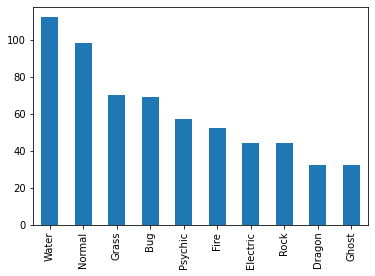

In [ ]:
pokemon_new['Type 1'].value_counts().head(10).plot(kind='bar')

##### Menampilkan jumlah Pokemon Type 2 pada 10 baris awal

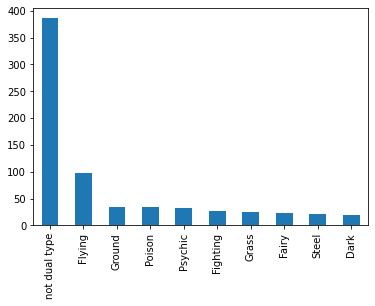

In [ ]:
pokemon_new['Type 2'].value_counts().head(10).plot(kind='bar')

##### dari diagram di atas terlihat bahwa jumlah Pokemon bertipe tunggal cukup banyak dibandingkan dengan Pokemon bertipe ganda. Hal itu ditunjukkan oleh diagram Type 2 jenis not dual type dengan perolehan nilai > 350

Kesimpulan Data Pokemon
Melalui EDA terhadap data Pokemon, diketahui bahwa :
- Pokemon memiliki 2 tipe, yaitu tipe tunggal (Type 1 saja) dan tipe ganda (Type 1 dan 2)
- Tipe ini menunjukkan karakter kekuatan yang dimiliki oleh masing-masing Pokemon
- Pokemon bertipe tunggal memiliki karakter yang cukup kuat, seperti dengan Pokemon yang bertipe ganda